In [2]:
from decimal import Decimal


OUTPUT = frozenset({(Decimal('2628000.000000000'), Decimal('370.456666667'), 
    Decimal('0.720000000')), (Decimal('3690000.000000000'), 
    Decimal('370.253333333'), Decimal('1.440000000')), 
    (Decimal('2460000.000000000'), Decimal('370.355000000'), 
    Decimal('0.960000000')), (Decimal('2796000.000000000'), 
    Decimal('370.660000000'), Decimal('0.480000000')), 
    (Decimal('3858000.000000000'), Decimal('370.294000000'), 
    Decimal('1.200000000'))})

UNITS = ('cost ($)', 'dissatisfaction', 'env impact (kg/yr CO2)')

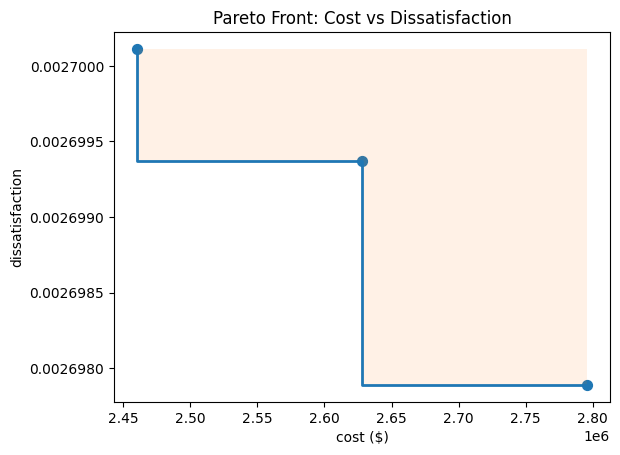

In [9]:
import matplotlib.pyplot as plt

def get_antichain(points):
    # sort by x value
    points = sorted(points, key=lambda x: x[0])
    antichain = []
    current_y = float('inf')
    for p in points:
        if p[1] < current_y:
            antichain.append(p)
            current_y = p[1]
    return antichain

# make pareto front graph from output with cost and disatisfaction only

points = [(float(t[0]), 1 / float(t[1])) for t in OUTPUT]
antichain = get_antichain(points)

plot_x = []
plot_y = []
for i, (x, y) in enumerate(antichain):
    plot_x.append(x)
    plot_y.append(y)
    if i < len(antichain)-1:
        x_next,y_next = antichain[i+1]
        x_inter = min(x,x_next)
        y_inter = min(y,y_next)
        plot_x.append(x_inter)
        plot_y.append(y_inter)

plt.plot(plot_x,plot_y, linewidth=2)
plt.scatter([p[0] for p in antichain], [p[1] for p in antichain], s=50)
plt.fill_between(plot_x,y1=plot_y,y2=max(plot_y), alpha=0.1)
plt.xlabel(UNITS[0])
plt.ylabel(UNITS[1])
plt.title("Pareto Front: Cost vs Dissatisfaction")
plt.show()